In [3]:
import pandas as pd
import numpy as np
from datetime import date,timedelta
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# from pandas_datareader import data as pdr
# from statsmodels.graphics.gofplots import qqplot
# from scipy.stats import normaltest
# from scipy.stats import anderson
# import scipy.stats
# import plotly.graph_objs as go
# import plotly.express as px
# import hvplot.pandas
# from yahoofinancials import YahooFinancials

In [29]:
#Init time period
start_date = date(2019, 10, 1)
end_date = date.today() - timedelta(days=1)

In [30]:
class Yahoo_Prices():
    
    def __init__(self):
        pass
    
    @classmethod
    def get(self,start_date,end_date,ticker_list=''):

        """ Gets yahoo price data for a given crypto/currency pair(ie.BTC-USD) within the 
        start and end date period. Returns a dictonary of dfs for each closing price.
        
        Parameters
        ----------
        date_start: starting date as MM-DD-YYYY format.
        date_end: ending date as MM-DD-YYYY format
        ticker_list: Single or list of ticker/cypto-currency pair(BTC-USD)
        
        example: prices = Yahoo_Prices.get(start_date,end_date,['BTC-USD','ETH-USD','LTC-USD','AMD','YUM'])"""

        #Calls the api for each item in the asset list. Stores list index as key, response as value. 
        price_df_dict = {i:pdr.get_data_yahoo(i,start_date,end_date)['Close'].to_frame() for i in ticker_list}

        #Dictonary of dfs concatenated to single df. 
        dataframe = pd.concat(price_df_dict,axis=1,join='inner')

        return dataframe
    
    @classmethod
    def get_csv(dataframe):
        pass

In [31]:
class Returns:
    
    @classmethod
    def get(self,dataframe):
        
        """Calculates the following returns for each asset in dataframe and creates a new dataframe for each.
        Returns a dictonary containing all calc types as key and result as value. 
        ---------
        'Daily Returns,'Daily Returns Avg','Daily Returns Cum','Daily Returns Std','Log Returns',
        'Log Returns Avg','Log Returns Std'
        --------
        example: returns = Returns.get(df name)
        To retrive daily reutns: returns['Daily Returns']
        To retrieve daily returns std: returns['Daily Returns Std']
        
        Parameters
        ----------
        Dataframe of closing prices. 
        """
        
        returns_dict = {
                        'Daily Returns':dataframe.pct_change(),
                        'Daily Returns Avg':dataframe.pct_change().mean(),
                        'Daily Returns Cum': (1 + dataframe.pct_change()).cumprod(),
                        'Daily Returns Std':dataframe.pct_change().std(),
                        'Log Returns':np.log(dataframe/dataframe.shift(1)),
                        'Log Returns Avg':np.log(dataframe/dataframe.shift(1).mean()),
                        'Log Returns Std':np.log(dataframe/dataframe.shift(1).std())
                        }

        return returns_dict
    
    @classmethod
    def present(self,dataframe):
        """ example for plots"""
        plot = dataframe.plot(figsize=(25,10),title=("Dictonary Key Value"))
        
        return plot
        
        

In [32]:
assets = Yahoo_Prices.get(start_date,end_date,['BTC-USD','ETH-USD','AAPl','AMD','YUM'])

In [34]:
assets.head()

,BTC-USD,ETH-USD,AAPl,AMD,YUM
,Close,Close,Close,Close,Close
Date,,,,,
2019-10-01,8393.041992,180.710510,224.589996,28.760000,112.889999
2019-10-02,8259.992188,175.199341,218.960007,28.309999,112.669998
2019-10-03,8205.939453,176.985001,220.820007,28.680000,113.680000
2019-10-04,8151.500488,176.351517,227.009995,29.010000,114.660004
2019-10-07,8228.783203,182.021561,227.059998,28.930000,113.690002


In [35]:
returns = Returns.get(assets)

In [44]:
returns['Daily Returns'].head()

,BTC-USD,ETH-USD,AAPl,AMD,YUM
,Close,Close,Close,Close,Close
Date,,,,,
2019-10-01,NaN,NaN,NaN,NaN,NaN
2019-10-02,-0.015852,-0.030497,-0.025068,-0.015647,-0.001949
2019-10-03,-0.006544,0.010192,0.008495,0.013070,0.008964
2019-10-04,-0.006634,-0.003579,0.028032,0.011506,0.008621
2019-10-07,0.009481,0.032152,0.000220,-0.002758,-0.008460


In [43]:
returns['Daily Returns']['BTC-USD'].head()

,Close
Date,
2019-10-01,NaN
2019-10-02,-0.015852
2019-10-03,-0.006544
2019-10-04,-0.006634
2019-10-07,0.009481


In [41]:
returns['Daily Returns Avg']

BTC-USD  Close   -0.003005
ETH-USD  Close   -0.000937
AAPl     Close    0.003996
AMD      Close    0.006451
YUM      Close   -0.001105
dtype: float64

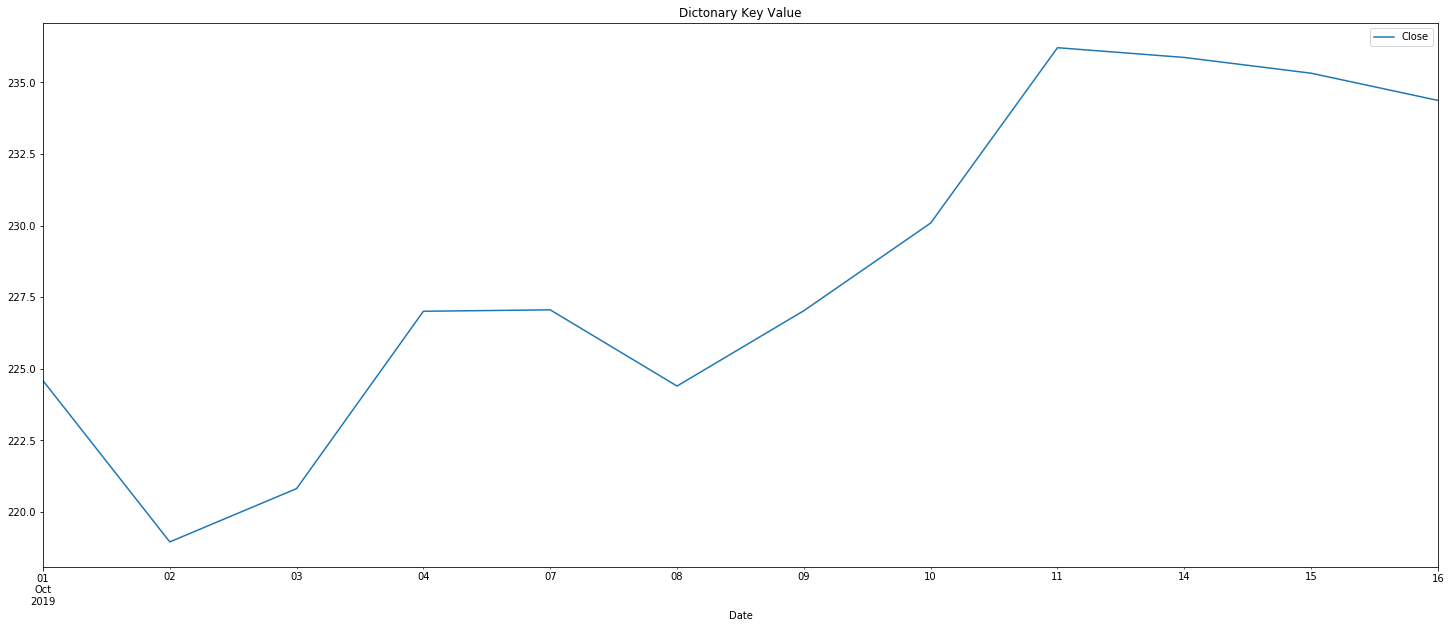

In [42]:
plots = Returns.present(assets['AAPl'])

In [ ]:
fig = plt.figure()
fig.set_size_inches(10,3)
BTC_df["Close"].pct_change().plot()
plt.title("Bitcoin Daily Returns", weight="bold");
print(f"Bitcoin Average Daily Return, {BTC_df_daily_returns_avg}")
print(f"Bitcoin STD of Daily Returns, {BTC_df_daily_returns_STD}")

In [ ]:
BTC_df["Close"].pct_change().hist(bins=150, density=True, histtype="stepfilled", alpha=.5)
plt.title("Histogram of Bitcoin Daily Returns", weight="bold")
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.yticks(range(0, 16))
plt.xlim(xmin=-0.35, xmax = 0.45)
print(f"Bitcoin STD of Daily Returns, {BTC_df_daily_returns_STD}")

In [ ]:
fig = plt.figure()
fig.set_size_inches(10,3)
BTC_df_log_return.plot()
plt.title("Bitcoin Log Returns", weight="bold");

In [ ]:
BTC_df_log_return.hist(bins=150, density=True, histtype="stepfilled", alpha=.5)
plt.title("Histogram of Bitcoin Log Returns", weight="bold")
plt.xlabel("Daily Log Returns")
plt.ylabel("Frequency")
plt.yticks(range(0, 20))
plt.xlim(xmin=-0.40, xmax = 0.6)

print(f"Bitcoin Average Log return, {BTC_df_log_return_avg}")
print(f"Bitcoin STD of Log returns, {BTC_df_log_return_STD}")

#qqplot(BTC_df_log_return, line='s')

In [ ]:
Q = BTC_df_log_return
scipy.stats.probplot(Q, dist=scipy.stats.norm, plot=plt.figure().add_subplot(111))
plt.title("Normal QQ-plot of Bitcoin log returns", weight="bold");

In [ ]:
# compare distribution charts to cryptocurrency, Ethereum
# calculate log returns and standard deviation 
ETH_df_close = ETH_df['Close']
ETH_df_daily_return = ETH_df_close.pct_change()
ETH_df_log_return = np.log(ETH_df_close/ETH_df_close.shift(1)) 
ETH_df_log_return_avg = ETH_df_log_return.mean()
ETH_df_log_return_std = ETH_df_log_return.std()

print(f"Ethereum Average Log return, {ETH_df_log_return_avg}")
print(f"Ethereum STD of Log returns, {ETH_df_log_return_std}")

ETH_df_log_return.hist(bins=100, density=True, histtype="stepfilled", alpha=.5)
plt.title("Histogram of Ethereum Log Returns", weight="bold")
plt.xlabel("Daily Log Returns")
plt.ylabel("Frequency")
plt.yticks(range(0, 15))
plt.xlim(xmin=-0.40, xmax = 0.6)
plt.show()



Q = ETH_df_log_return
scipy.stats.probplot(Q, dist=scipy.stats.norm, plot=plt.figure().add_subplot(111))
plt.title("Normal QQ-plot of Ethereum log returns", weight="bold");

In [ ]:
# compare distribution charts to a low volatility stock, YUM
# calculate log returns
YUM_df_close = YUM_df['Close']
YUM_df_log_return = np.log(YUM_df_close/YUM_df_close.shift(1)) 
YUM_df_log_return_avg = YUM_df_log_return.mean()
YUM_df_log_return_std = YUM_df_log_return.std()

print(f"YUM Brands Average Log return, {YUM_df_log_return_avg}")
print(f"YUM Brands STD of Log returns, {YUM_df_log_return_std}")

YUM_df_log_return.hist(bins=250, density=True, histtype="stepfilled", alpha=.5)
plt.title("Histogram of YUM! Brands, Log Returns", weight="bold")
plt.xlabel("Daily Log Returns")
plt.ylabel("Frequency")
plt.xlim(xmin=-0.15, xmax = 0.2)
plt.show()

Q = YUM_df_log_return
scipy.stats.probplot(Q, dist=scipy.stats.norm, plot=plt.figure().add_subplot(111))
plt.title("Normal QQ-plot of YUM! Brands, Inc Log Returns", weight="bold");

In [ ]:
# compare distribution charts to a high volatility stock, AMD
# calculate log returns
AMD_df_close = AMD_df['Close']
AMD_df_log_return = np.log(AMD_df_close/AMD_df_close.shift(1)) 
AMD_df_log_return_avg = AMD_df_log_return.mean()
AMD_df_log_return_std = AMD_df_log_return.std()

print(f"AMD Brands Average Log return, {AMD_df_log_return_avg}")
print(f"AMD Brands STD of Log returns, {AMD_df_log_return_std}")

AMD_df_log_return.hist(bins=250, density=True, histtype="stepfilled", alpha=.5)
plt.title("Histogram of Advanced Micro Devices, Inc Log Returns", weight="bold")
plt.xlabel("Daily Log Returns")
plt.ylabel("Frequency")
plt.xlim(xmin=-0.15, xmax = 0.2)
plt.show()

Q = AMD_df_log_return
scipy.stats.probplot(Q, dist=scipy.stats.norm, plot=plt.figure().add_subplot(111))
plt.title("Normal QQ-plot of Advanced Micro Devices, Inc Log Returns", weight="bold");

In [ ]:
# normality tests on BTC
stat, p = normaltest(BTC_df_log_return)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

In [ ]:
# normality tests on YUM

stat, p = normaltest(YUM_df_log_return)
print((stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

In [ ]:

result = anderson(BTC_df_log_return)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

In [ ]:

result = anderson(YUM_df_log_return)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

In [ ]:
BTC_df_volume = BTC_df['Volume']
BTC_df_yearly_avg_volume = BTC_df_volume.groupby([BTC_df.index.year]).mean()
BTC_df_yearly_avg_volume
BTC_df_yearly_avg_volume.plot(kind='bar', title='Average Volume per Year')


In [ ]:
#which months have the highest trading volume, this could be skewed
BTC_df_monthly_avg_volume = BTC_df_volume.groupby([BTC_df.index.month]).mean()
BTC_df_monthly_avg_volume.plot(kind='bar', title='Historical Average Trading Volume by Month') 

In [ ]:
cryptocurrencies = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'BCH-USD', 'LTC']
BTC_USD = YahooFinancials('BTC-USD')
BTC_summary = BTC_USD.get_summary_data
BTC_USD.get_daily_low()
BTC_USD.get_three_month_avg_daily_volume()

In [ ]:
BTC_df_log_return.to_csv("BTC_log_return.csv")

In [ ]:
BTC_df.to_csv("BTC trading history.csv")